# Project: Exploring Appointment No-Shows in Brazilian Healthcare Centers

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li> 
<li><a href="#ml">A Machine Learning Approach</a></li> 
<li><a href="#conclusions and Limitations">Conclusions and Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Data set used in this project is that of the Brazilian Healthcare program better known by the name Bolsa Familia.The Dataset has multiple variables including appointment dates, times, Patient ID's, Patient's health record such as Diabetes Hypertension etc.There are totally 14 features and about 11500 records. I try to explore this dataset for relationships between variables,more specifically the No-Shows Column,which indicates if a patient showed up to the appointment or not. I would like to explore the relationship between all other features and the No-Shows and try build a predictive model using logistic regression to understand patient behaviour.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [29]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime,timedelta 
import sklearn
import seaborn as sns
#%matplotlib inline

df=pd.read_csv('noshow.csv') #Reading CSV
df.info() #Deriving General info of the Dataset
df.describe() #finding common statistics like mean std dev etc
df.head()

q=df.query('Age==0').PatientId.count() #Counting Number of People aged 0
print('Number of People Aged 0 :',q)

w=df.duplicated().sum() #Counting Duplicates
print('Number of Duplicates :',w)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Number of People Aged 0 : 3539
Number of Duplicates : 0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Data Cleaning

>The problem with this data is of some records having people whose age is 0. As i plan to later investigate the relationship between age and patient behaviour,I will Delete these records having zero age. There are 3539 such records which is about 3% of the records and will not significantly affect the integrity of the dataset.

> There are also some records that have appointment date earlier than the scheduled date. There are only 5 such records and i will be deleting those too.

>The Data further needs to be manipulated with respect to the following:
><li> The Scheduled Day and Appointment Day columns have date and time in the same field seperated by 'T' and 'Z'.I will      seperate these fields into date fields with Datetime Format.
><li> Some headers are misspelled and some are inconveniently named, we will be replacing these names.
><li> After converting datetimes we need to drop the original columns.
><li> For further analysis,a field that calculates the time difference between appointment day and scheduled day would be helpful.
><li>I Also replaced yes/no values in the no-show column with 1 and 0 respectively to make it easier for numerical analysis.

</ul>

Number of Patients where Scheduled day > Appointment Day : 5


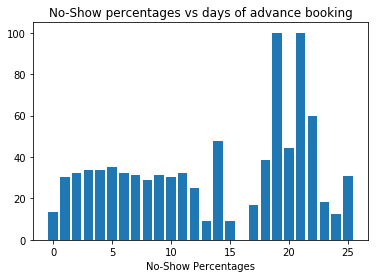

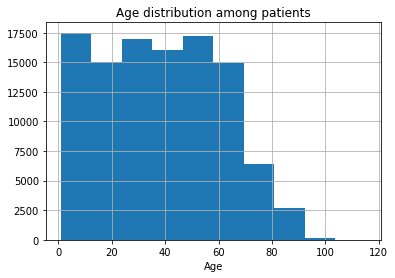

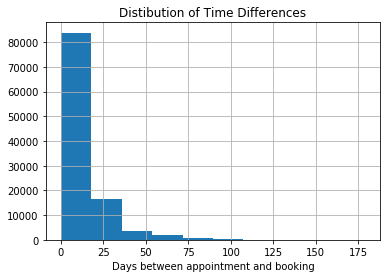

In [35]:

df=pd.read_csv('noshow.csv')

df_schedule=df['ScheduledDay'].str.split('T') #Splitting ScheduledDay to Date and Time field

df['scheduled_date']=df_schedule.str.get(0) #Adding Scheduled Date column to DataFrame

df_apt=df['AppointmentDay'].str.split('T')#Splitting AppointmentDay to Date and Time field

df['Appointment_Date']=df_apt.str.get(0) #Adding Appointment Date to Dataframe

df.drop('AppointmentDay',axis=1,inplace=True)#Dropping original AppointmentDay Column

df.drop('ScheduledDay',axis=1,inplace=True) # Dropping original ScheduledDay Column

df.rename(columns={'Hipertension':'HyperTension','Scholarship':'Bolsa_Familia','Handcap':'Handicap','No-show':'No_show'}, inplace=True) #Renaming Column Titles

a=  (pd.to_datetime(df.Appointment_Date)-pd.to_datetime(df.scheduled_date))/timedelta(days=1) # Creating Time Difference List

df['Time_Difference']=pd.DataFrame(a) # Inserting TimeDifference Column to DataFrame

v=df.query('Time_Difference < 0').PatientId.count()
print('Number of Patients where Scheduled day > Appointment Day :',v)    

# Loop to Remove Z from scheduled_time
dw=[] #create blank list
for i in df_schedule.str.get(1): #start loop
    i=list(i) #converting contents of i to list
    i.remove('Z') #removing Z from the list
    i=''.join(i) #rejoining date with a gap
    dw.append(i) #appending i to blank list dw
    
df['scheduled_time']=pd.DataFrame(dw) # Adding Column to DataFrame

df=df[(df['Time_Difference']>=0) & (df['Age']>0)] # Excluding bad records

df['No_show'].replace('Yes',1,inplace=True) # Converting column to binary values
df['No_show'].replace('No',0,inplace=True)  # Converting column to binary values



plt1=plt.figure()#plotting histogram of age distribution
df['Age'].hist()
plt.title('Age distribution among patients')
plt.xlabel('Age')

plt2=plt.figure() #plotting histogram of time difference distribution
df['Time_Difference'].hist()
plt.title('Distibution of Time Differences')
plt.xlabel('Days between appointment and booking')
plt.show()



The above two plots are some distribution statistics for the dataframe created.They are meant for visual represetation of the data we have and do not serve any specific questions as such. The first one is the age distibution.We can see that children aged 1-10 constitute the highest number (approx 17500) of patients.The next highest group is the 50-60 age group with almost the same number of people.This distribution looks like a well balanced one demographically, there is an equivalent young population as the older population.

With regards to the second histogram,it is a distibution of number of days in advance the booking has been made.It is extremely right skewed.We can see that there arent a lot of people who book early.More than 80000 of the people book their appointment between 0-20 days in advance.

<a id='eda'></a>
## Exploratory Data Analysis


### Relationship between gender and no-shows

>From the pie charts below, 80% of males show up and a similar percentage of women population show up at the appointment, we can say that there is no significant difference between the percentage of no-shows in the female population to the percentage of no- shows in the male population. however this is just a tentative hypothesis made from simple statistical percentage, which should be further examined using statistical tests to conclude this relationship.

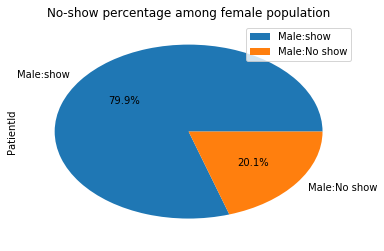

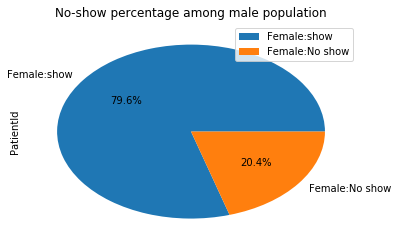

In [33]:
gender=df.groupby(['Gender','No_show']).count() #counting no-shows in each gender category
#gender.plot.pie(y='PatientId',labels=['Female:show','Female:No show','Male:show','Male:No show'],autopct='%1.1f%%') #drawing pie plot for population proportion of no shows by gender

gender_m=df[df['Gender']=='M'].groupby('No_show').count() #counting no-shows in male gender category
gender_m.plot.pie(y='PatientId',labels=['Male:show','Male:No show'],autopct='%1.1f%%') #plotting male no shows in pie chart
plt.title('No-show percentage among female population')

gender_f=df[df['Gender']=='F'].groupby('No_show').count()#counting no-shows in Female gender category
gender_f.plot.pie(y='PatientId',labels=['Female:show','Female:No show'],autopct='%1.1f%%')#plotting Female no shows in pie chart
plt.title('No-show percentage among male population')
pd.DataFrame(df.groupby(['No_show']).PatientId.count()) #total shows and no shows in the full population

plt.show()


The above pie charts show the percentage of noshows among the male and female populations


### Relationship between No-shows and Time-Difference 

>This is to discover any correlation between no-shows and the time difference in which the booking was made.Since there are many values, I made bins to discover this relationship.The steps of these bins are 25 days.There was no relationship discovered between Time_Difference and no-shows. However some interesting insights were obtained.The highest percentage of noshows were in the 125-150 day range. Almost half of the people who booked their appointments 125-150 days in advance did not show up.The other interesting pattern discovered here is on the bar chart. From 25-125 the noshow frequency per bin keeps reducing, a similar pattern starts at 125-200.

    No_show   indexx  Total_Patient_count  proportion
0    9324.0      0-7                68600   13.591837
1    3554.0     7-14                11644   30.522157
2    2774.0    14-21                 8583   32.319702
3    2190.0    21-28                 6468   33.858998
4    1750.0    28-35                 5198   33.666795
5     772.0    35-42                 2199   35.106867
6     345.0    42-49                 1074   32.122905
7     255.0    49-56                  813   31.365314
8     249.0    56-63                  868   28.686636
9     212.0    63-70                  673   31.500743
10    110.0    70-77                  360   30.555556
11     46.0    77-84                  142   32.394366
12     51.0    84-91                  203   25.123153
13      2.0    91-98                   22    9.090909
14     10.0   98-105                   21   47.619048
15      2.0  105-112                   22    9.090909
16      0.0  112-119                    7    0.000000
17      1.0  119-126        

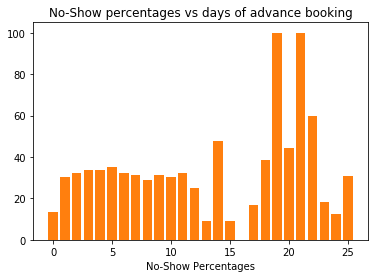

In [37]:
import  matplotlib.pyplot  as plt
bins=np.arange(0,210,7) #creating bins to divide data into bins based on the difference between appointment and scheduled date


import numpy as np
bins=np.arange(0,210,7)#creating numbers for bins i.e in steps of 7 ,each bin represting a week
names=[] #creating bin label list
for i in range(1,len(bins)):#loop for creating bin labels
    names.append(str(bins[i-1])+"-"+str(bins[i]))#appending values to list


#naming the bins for histogram x label
df['booking_intervals']=pd.cut(df['Time_Difference'],bins,labels=names,include_lowest=True)#dividing the data into above created bins
nu=df.groupby('booking_intervals').agg({'No_show':np.sum})#counting no-shows per each bin
nu['indexx']=nu.index #creating an index for joining with other tables
de=pd.DataFrame(df.groupby('booking_intervals').PatientId.count())#counting total number of patients in each bin
de['indexx']=de.index#creating index for joining
nu_de=pd.merge(nu,de,on='indexx')#joining tables with total patient count to total noshows
nu_de['proportion']=100*nu_de['No_show']/nu_de['PatientId']#calculating percentage no shows per bin and adding new colum for this value
nu_de.rename(columns={'PatientId' : 'Total_Patient_count'}, inplace=True)#renaming column
print(nu_de)#printing the table
#plt.bar(nu_de.index,nu_de['proportion'])#plotting bar plot for percentage of no shows in each bin
nu_de.drop(['No_show','Total_Patient_count'],axis=1,inplace=True)#dropping unnecessary columns for bar plot


plt.bar(nu_de.index,nu_de['proportion'],label='Percentage no shows')#plotting bar plot for percentage of no shows in each bin
plt.title('No-Show percentages vs days of advance booking')#plot title
plt.xlabel('No-Show Percentages')#plot x axis label
plt.show()

The above bar plot is for no show percentages in each bin i.e appointment made 1 week in advance,2 weeks in advance and so on. Notice that the average no-show percentage for the first 14 weeks is relatively low as compared to the next ten weeks.The obvious observation is that in bin 0 i.e for the 1st week, the no shows are lowest, this is also intuitive as people with same day booking maybe more likely to show-up rather than not.

### Relationship between noshows and day of the week

>Here we try to explore if there is any relationship between the day of the week and the no-shows.For example,if no-shows on a monday are more or less compared to no-shows on any other days.To analyze relationship between day of the week and the no-shows,i used datetime module to bring up the weekday from the dates given.

>From this analysis and visualization,it was found that a high percentage of people were absent on saturdays. However there were only 39  records with appointments on saturday, this may be a statistically insignificant number.As for the rest of the weekdays,the no shows are consistently uniform at around 20%. Thus there is no observed pattern here.

           noshows
Appt_Day          
Friday        3940
Monday        4514
Saturday         9
Thursday      3243
Tuesday       5022
Wednesday     4947
             noshows  DayNum  daycounts  Noshow_Percentage
Appt_Day_No                                               
0               4514       0      21902          20.609990
1               5022       1      24829          20.226348
2               4947       2      25089          19.717805
3               3243       3      16658          19.468123
4               3940       4      18465          21.337666
5                  9       5         39          23.076923


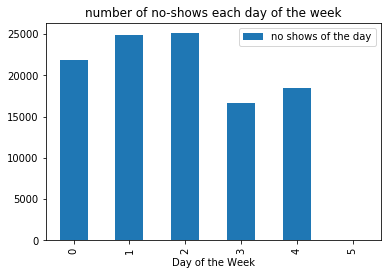

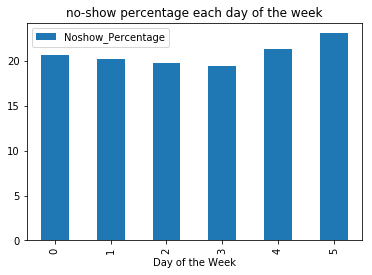

In [40]:
labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']#creating weekday labels

df['Appointment_Date']=pd.to_datetime(df.Appointment_Date)#converting to datetime format to further convert to weekday

df['Appt_Day']=df['Appointment_Date'].dt.weekday_name#converting date to weekday

df['Appt_Day_No']=df['Appointment_Date'].dt.weekday #replacing column

weekdayNo=df.groupby('Appt_Day_No').agg({'No_show':np.sum}) #calculating number of noshows for each day

weekdayNo['DayNum']=weekdayNo.index #creating seperate column for indexing 

weekdayNo['daycounts']=df.groupby('Appt_Day_No').PatientId.count() #calculating total number of appointments per day

weekdayNo.rename(columns={'No_show':'noshows'},inplace=True) #renaming weekday column for easier utilisation in further process

weekdayNo.plot.bar('DayNum','daycounts',label='no shows of the day'); #bar plot for no shows each day

plt.title('number of no-shows each day of the week')#plot title
plt.xlabel('Day of the Week') # x-axis label


weekdayNo['Noshow_Percentage']=100*weekdayNo['noshows']/weekdayNo['daycounts'] #percentage of noshows each day

#weekdayNo.plot(x='DayNum',y='Noshow_Percentage',kind='scatter')

weekdayNo.plot.bar('DayNum','Noshow_Percentage')#bar plot for percentage of noshows each day
plt.title('no-show percentage each day of the week')
plt.xlabel('Day of the Week')#x-axis label
weekday=df.groupby('Appt_Day').agg({'No_show':np.sum}) #noshows each day

weekday.rename(columns={'No_show':'noshows'},inplace=True) #column renaming

#weekday.plot.pie(y='noshows',autopct='%1.1f%%',labels=weekday.index,figsize=(7,7))

print(weekday)
print(weekdayNo)
plt.show()

The above two plots represent noshows each day of the week.The first plot shows absolute number of noshows each day and the second plot shows percentage of noshows each day of the week. From these two plots, its observed that there are almost no appointments made on a saturday.However the average percentage of absentees are similar over all days throughout the week.No pattern here.



### No-Shows by Neighborhood

>We explore if people from certain neighborhoods tend to be more absent than people from some other neighborhoods.Further scope of this analysis could be the socio-economic situations of these neighborhoods.But for now, we analysed percentage of no-shows from each neighbourhood.The average no show per area is 20% with a standard deviation of 9.This represents a huge variability in noshows with respect to the mean noshows.

Average No show percentage by area is : 20.529076414264242
No show standard deviation by area is : 9.746555146477178


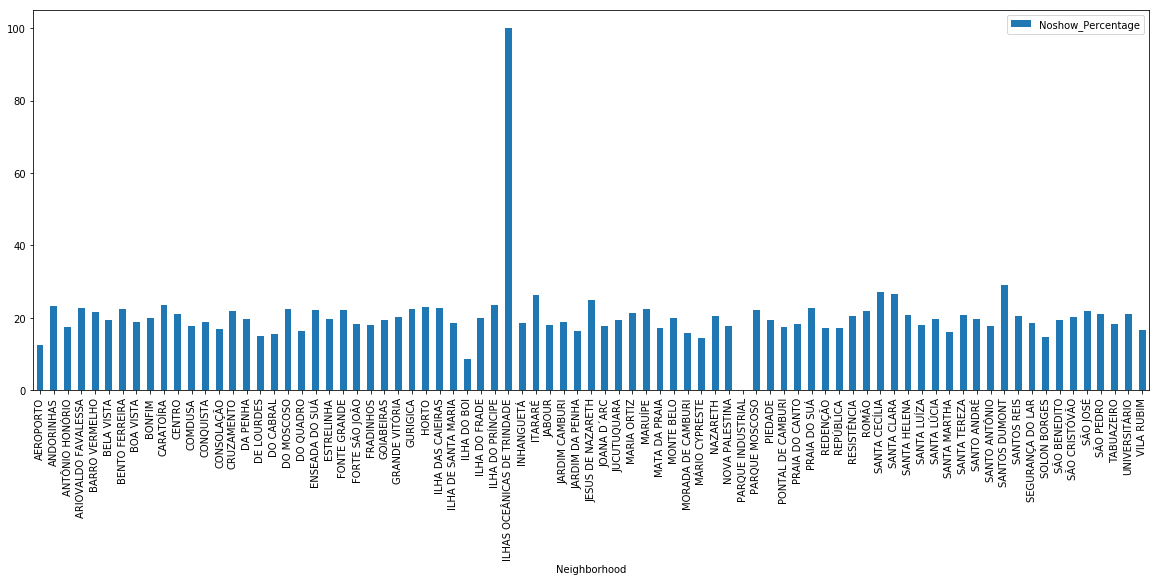

In [43]:
vc=pd.DataFrame(df.groupby('Neighbourhood').No_show.count()) #Counting total population in each neighborhood
vc['nbrhd']=vc.index #creating index column for using in merge function
sd=pd.DataFrame(df.groupby('Neighbourhood').agg({'No_show':np.sum})) #counting noshows in each neighborhood
sd['nbrhd']=sd.index #creating index column for using in merge function


areas=pd.merge(vc,sd,on='nbrhd') #merging noshow and total population tables
areas.rename(columns={'nbrhd':'Neighborhood','No_show_x':'Total_Appointments','No_show_y':'Noshows'},inplace=True)#renaming columns

areas['Noshow_Percentage']=100*areas['Noshows']/areas['Total_Appointments'] #Calculating noshow percentage per area

areas.plot.bar('Neighborhood','Noshow_Percentage',figsize=(20,7)) #plotting percentage absentees per area

print('Average No show percentage by area is :', areas['Noshow_Percentage'].mean()) #average no shows overall
print( 'No show standard deviation by area is :' ,areas['Noshow_Percentage'].std()) #standard deviation of noshows 
areas
#print(areas.to_string())
#plt.savefig('noshowbar.png')

df.head()
plt.show()

In the above barplot of percentage of noshows in each neighborhood,we see parque industrial has no absentees,but on inspecting the data,it was found that there was only one appointment in that locality.This should be considered an outlier.The highest noshows were form Ilhas Oceanicas De Trinidade.On further investigation it was found out that Ilhas Oceanicas Trinidade is a small island off the Brazilian coast  with very few people living there (https://pt.wikipedia.org/wiki/Ilhas_oce%C3%A2nicas_do_Brasil). This may be the reason there were only two appointments and none of them showed up.This too can be considered an outlier. 

### No Shows vs Handicap severity
> We explore the relationship between percentage of absentees among the handicap and non handicaps. Handicap has 4 levels of severity in our data.A trend was observed here that the absentees increase as the handicap severity increases.

In [44]:
import statsmodels.api as sm

v=pd.DataFrame(df.groupby('Handicap').agg({'No_show':np.sum})) #Counting noshows among handicaps
v['index']=v.index #creating index column for merging
l=pd.DataFrame(df.groupby('Handicap').PatientId.count()) #Counting total patients in handicap
l['index']=l.index #creating index column for merging
vl=pd.merge(v,l,on=v['index']) #merging total count and percentage column

vl.drop('index_x',axis=1,inplace=True) #dropping duplicate columns
vl.drop('index_y',axis=1,inplace=True)  #dropping duplicate columns
vl.rename(columns={'PatientId':'Total_Patient_Count'},inplace=True) #renaming columns

vl['percent_no-shows']=100*vl['No_show']/vl['Total_Patient_Count'] #calculating percentage of absentees in each level
vl['index']=vl.index #creating index to use in plots
vl=vl[vl['index']!=0] #excluding non handicap individuals
vl.plot('index','percent_no-shows') #plotting noshows versus handicap severity level
vl
model=sm.OLS(vl['percent_no-shows'],vl['index']) #modeling an ordinary least squares fitting for linear regression to inspect relationship between handicap severity and noshows
results=model.fit() #fitting the model
print(results.summary()) #regression statistics and results
plt.ylabel('No show percentage') # Y-axis 
plt.xlabel('Handicap Severity') #X-axis
plt.title('Relationship between no-shows and Handicap Severity') #plot title

                            OLS Regression Results                            
Dep. Variable:       percent_no-shows   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     66.07
Date:                Thu, 21 Feb 2019   Prob (F-statistic):            0.00389
Time:                        13:03:27   Log-Likelihood:                -12.172
No. Observations:                   4   AIC:                             26.34
Df Residuals:                       3   BIC:                             25.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
index          8.6951      1.070      8.128      0.0

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0.5,1,'Relationship between no-shows and Handicap Severity')

The above plot gives a sense of the trend in handicap severity vs no show percentage.The regression results also agree.The regression coefficient is about 8.7 which indicates a good correlation.For every a level increase in handicap severity,no shows increase by approximately 8.7% .The P-value is 0.004, having a cutoff of 0.005, this too gives a good significance.


### SMS Received vs no-shows
> We explore whether a SMS reminder to the patient on the day of the appointment affects their appointment behaviour.About 16% of the patients who did not receive the SMS were noshows, while about 27% of the patients who received the SMS were noshows. An interesting trend is seen here.Patients who received their SMS were 10% more likely to be absent than patients who did not.This is counter intuitive. It may be caused by misinterpretation of the data of the binary indicator for SMS_Received field.If that is the case,then the interpretation makes sense.

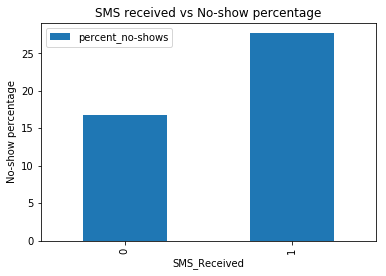

In [47]:
v=pd.DataFrame(df.groupby('SMS_received').agg({'No_show':np.sum})) #counting number of noshows in sms-received and not received category
v['index']=v.index #creating index column
l=pd.DataFrame(df.groupby('SMS_received').PatientId.count()) #counting total patients
l['index']=l.index #creating index column
vl=pd.merge(v,l,on=v['index']) #merging based on index
vl.drop('index_x',axis=1,inplace=True) #droppping duplpicate columns
vl.drop('index_y',axis=1,inplace=True) #dropping duplicate columns
vl.rename(columns={'PatientId':'Total_Patient_Count'},inplace=True) #renaming columns
vl['percent_no-shows']=100*vl['No_show']/vl['Total_Patient_Count'] #calculating percentage no-shows in each category
vl['SMS_Received']=vl.index #creating index for plot
vl.plot.bar('SMS_Received','percent_no-shows') #plotting bar graph
plt.ylabel('No-show percentage') #ylabel
plt.title('SMS received vs No-show percentage') #title
vl
plt.show()

>The above plot clearly indicates that people who received SMS were 10% more likely to be absent that those that didnt receive the SMS. This may be due to erroneous interpretation of data, i.e if 1 indicates that SMS wasnt received,then this data makes sense.


<a id='ml'></a>
## A Machine Learning Approach

> The previous analysis considers only visualization and simple statistics and gives a general overview of the population, this however does not give a deeper insight as to individual behaviour and the factors that influence them. Machine Learning comes to great use in these cases where each individual is considered based on corresponsing features. In our case,since we have binary outcomes, we use Logistic Regression and Random Forest Classifier to further explore.


### Data Preparation

>To implement regression models, we need to manipulate our data for it to be interpreted by the algorithm.Therefore we remove some of the columns that prove to be useless to our model, for example the Patient ID, Appointment ID and so on.It should also be noted that prelimnary logistic regression analysis was run on Gretl to find the significance of each feature and it was decided to remove some of these based on their p-values and the corresponding R Squared values for the model.The Gretl model has not been included here, but it should be known that the features have been removed after rigorous analysis.

In [48]:
l0data=df.drop(['PatientId','AppointmentID','Neighbourhood','scheduled_date','Appointment_Date','scheduled_time','booking_intervals'],axis=1)
l0data['Gender_ind']=l0data['Gender']
ce=pd.get_dummies(l0data['Appt_Day'])
l0data['Gender_ind'].replace('F',0,inplace=True)
l0data['Gender_ind'].replace('M',1,inplace=True)
l0data.drop('Gender',axis=1,inplace=True)
l0data=pd.concat([ce,l0data],axis=1)
l0data.drop('Appt_Day',axis=1, inplace=True)
from sklearn import preprocessing
l0data.head()

Data_Balance0=l0data[l0data['No_show']==0].Age.count()/l0data[l0data['No_show']==1].Age.count()
print('Prelim Data Balance',Data_Balance0)
l0data.head()

Prelim Data Balance 3.9357324106113034


,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Age,Bolsa_Familia,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Time_Difference,Appt_Day_No,Gender_ind
0,1,0,0,0,0,0,62,0,1,0,0,0,0,0,0.0,4,0
1,1,0,0,0,0,0,56,0,0,0,0,0,0,0,0.0,4,1
2,1,0,0,0,0,0,62,0,0,0,0,0,0,0,0.0,4,0
3,1,0,0,0,0,0,8,0,0,0,0,0,0,0,0.0,4,0
4,1,0,0,0,0,0,56,0,1,1,0,0,0,0,0.0,4,0


> Its seen above that there is a data imbalance. i.e there are almost 4 times shows than there are no_shows. Running an algorithm on this forces the model to learn more of shows than no_shows.Our interest here is to learn more about no shows and the factors affecting them. There are many ways around this. The data can be balanced using oversampling or undersampling. oversampling is when the underrepresented class is bootstrapped and more samples are obtained from this class to balance out the data.Undersampling is to simply delete some of the overrepresented class records to balance out the data.We try both methods here to see which works better for us.

>In our case the underrepresented class is the no-show class, which consitutes only about 20% of the population. For undersampling, we simply remove about 40000 of the records so that shows and no shows are balanced. For the other case of oversampling, we are bootstrapping the underrepresented part, i.e the no_shows. We will simply add records from the sample of no-shows (Sampling with replacement) so that there is a balanced representation.

 ## Oversampling

> ### Logistic Regression

In [28]:



counts=l0data[l0data['No_show']==1].sample(60000,replace=True)
oversample=pd.concat([l0data,counts])
X=oversample.drop(['Time_Difference','Age','No_show','Monday','Tuesday','Wednesday','Handicap','Thursday','Friday','Saturday','HyperTension','Gender_ind'],axis=1)

a=[]
b=[]
avg=np.mean(oversample['Age'])
stdev=np.std(oversample['Age'])
avg1=np.mean(oversample['Time_Difference'])
stdev1=np.std(oversample['Time_Difference'])

for i in oversample['Age']:
    a.append((i-avg)/stdev)

for j in oversample['Time_Difference']:
    b.append((j-avg1)/stdev1)
X['Standardised_TimeDifference']=b
X['Standardised_Age']=a
y=oversample['No_show']





from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lm=LogisticRegression()

lm.fit(X_train,y_train)

prediction=lm.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,prediction)
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

                                              



print(confusion_matrix(y_test,prediction))

accuracy_scores = pd.DataFrame([cross_val_score(lm,X,y,cv=5,scoring='f1_macro'),cross_val_score(lm,X,y,cv=5,scoring='accuracy'),cross_val_score(lm,X,y,cv=5,scoring='precision'),cross_val_score(lm,X,y,cv=5,scoring='recall')],index=['f1','accuracy','precision','recall'])
accuracy_scores['Mean_Score']=accuracy_scores.mean(axis=1)
accuracy_scores['Standard_Deviation']=accuracy_scores.std(axis=1)
weights=pd.DataFrame(lm.coef_,columns=X.columns,index=['Weights'])
absl=pd.DataFrame(abs(lm.coef_),columns=X.columns)
ranks=pd.DataFrame(absl.rank(axis=1,ascending=False))

from IPython.display import display
display(weights)
print('Feature Importance Table')

display(accuracy_scores)
print('Model Performance')
display(ranks)
print('Feature Importance Ranking')


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[18108  7252]
 [11643 13092]]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

,Bolsa_Familia,Diabetes,Alcoholism,SMS_received,Appt_Day_No,Standardised_TimeDifference,Standardised_Age
Weights,0.197428,0.120893,0.207152,0.370015,0.02371,0.45266,-0.191697


Feature Importance Table


,0,1,2,3,4,Mean_Score,Standard_Deviation
f1,0.617933,0.623135,0.611662,0.639409,0.599050,0.618238,0.013294
accuracy,0.624547,0.625715,0.615223,0.645167,0.600431,0.622217,0.014614
precision,0.649826,0.634100,0.625694,0.674636,0.599033,0.636658,0.025132
recall,0.503949,0.555066,0.531007,0.530334,0.553780,0.534827,0.018746


Model Performance


,Bolsa_Familia,Diabetes,Alcoholism,SMS_received,Appt_Day_No,Standardised_TimeDifference,Standardised_Age
0,4.0,6.0,3.0,2.0,7.0,1.0,5.0


Feature Importance Ranking


> ### Random Forest

In [49]:



counts=l0data[l0data['No_show']==1].sample(60000,replace=True)
oversample=pd.concat([l0data,counts])
X=oversample.drop(['Time_Difference','Appt_Day_No','Age','No_show','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','HyperTension','Handicap','Gender_ind'],axis=1)

a=[]
b=[]
avg=np.mean(oversample['Age'])
stdev=np.std(oversample['Age'])
avg1=np.mean(oversample['Time_Difference'])
stdev1=np.std(oversample['Time_Difference'])

for i in oversample['Age']:
    a.append((i-avg)/stdev)

for j in oversample['Time_Difference']:
    b.append((j-avg1)/stdev1)
X['Standardised_TimeDifference']=b
X['Standardised_Age']=a
y=oversample['No_show']



from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

lm=RandomForestClassifier()
lm.fit(X_train,y_train)

prediction=lm.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,prediction)
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

                                              




print(confusion_matrix(y_test,prediction))

accuracy_scores = pd.DataFrame([cross_val_score(lm,X,y,cv=5,scoring='f1_macro'),cross_val_score(lm,X,y,cv=5,scoring='accuracy'),cross_val_score(lm,X,y,cv=5,scoring='precision'),cross_val_score(lm,X,y,cv=5,scoring='recall')],index=['f1','accuracy','precision','recall'])
accuracy_scores['Mean_Score']=accuracy_scores.mean(axis=1)
accuracy_scores['Standard_Deviation']=accuracy_scores.std(axis=1)
weights=pd.DataFrame(lm.feature_importances_,index=X.columns,columns=['Importances'])
absl=pd.DataFrame(abs(lm.feature_importances_),index=X.columns)
ranks=pd.DataFrame(absl.rank(axis=0,ascending=False))

from IPython.display import display

display(weights)
print('Feature Importance Table')

display(accuracy_scores)
print('Model Performance')
display(ranks)
print('Feature Importance Ranking')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11404  5485]
 [ 4014 12494]]


,Importances
Bolsa_Familia,0.004149
Diabetes,0.004509
Alcoholism,0.003790
SMS_received,0.031960
Standardised_TimeDifference,0.616845
Standardised_Age,0.338746


Feature Importance Table


,0,1,2,3,4,Mean_Score,Standard_Deviation
f1,0.697399,0.695761,0.717079,0.733879,0.712459,0.711315,0.013995
accuracy,0.700542,0.697697,0.717272,0.735537,0.712331,0.712676,0.013531
precision,0.670424,0.668757,0.693162,0.713286,0.681131,0.685352,0.016476
recall,0.760453,0.758923,0.758555,0.771166,0.780043,0.765828,0.008486


Model Performance


,0
Bolsa_Familia,5.0
Diabetes,4.0
Alcoholism,6.0
SMS_received,3.0
Standardised_TimeDifference,1.0
Standardised_Age,2.0


Feature Importance Ranking


## Undersampling

> ### Logistic Regression

In [145]:

ones=l0data[l0data['No_show']==1]
zeros=l0data[l0data['No_show']==0]
zeros1=zeros[:22000]
undersample=pd.concat([ones,zeros1])
from sklearn.utils import shuffle
undersample=shuffle(undersample)

X=undersample.drop(['Time_Difference','Age','No_show','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','HyperTension','Handicap','Gender_ind'],axis=1)

a=[]
b=[]

avg=np.mean(undersample['Age'])
stdev=np.std(undersample['Age'])
avg1=np.mean(undersample['Time_Difference'])
stdev1=np.std(undersample['Time_Difference'])

for i in undersample['Age']:
    a.append((i-avg)/stdev)

for j in undersample['Time_Difference']:
    b.append((j-avg1)/stdev1)

X['Standardized_TimeDifference']=b
X['Standardized_Age']=a

y=undersample['No_show']





from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lm=LogisticRegression()

lm.fit(X_train,y_train)

prediction=lm.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,prediction)
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

scores = cross_val_score(lm,X,y, cv=5)
scores                                              


accuracy_scores = pd.DataFrame([cross_val_score(lm,X,y,cv=5,scoring='f1_macro'),cross_val_score(lm,X,y,cv=5,scoring='accuracy'),cross_val_score(lm,X,y,cv=5,scoring='precision'),cross_val_score(lm,X,y,cv=5,scoring='recall')],index=['f1','accuracy','precision','recall'])
accuracy_scores['Mean_Score']=accuracy_scores.mean(axis=1)
accuracy_scores['Standard_Deviation']=accuracy_scores.std(axis=1)
weights=pd.DataFrame(lm.coef_,columns=X.columns)
absl=pd.DataFrame(abs(lm.coef_),columns=X.columns)
ranks=pd.DataFrame(absl.rank(axis=1,ascending=False))
from IPython.display import display



print(confusion_matrix(y_test,prediction))

display(weights)
print('Feature Importance Table')

display(accuracy_scores)
print('Model Performance')
display(ranks)
print('Feature Importance Ranking')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[[4725 1865]
 [2838 3675]]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Bolsa_Familia,Diabetes,Alcoholism,SMS_received,Standardized_TimeDifference,Standardized_Age
0,0.288464,0.227009,-0.221289,0.401196,0.53828,-0.187647


Feature Importance Table


,0,1,2,3,4,Mean_Score,Standard_Deviation
f1,0.640113,0.636838,0.640628,0.651405,0.642432,0.642283,0.004906
accuracy,0.642816,0.639382,0.642587,0.653807,0.645335,0.644785,0.004891
precision,0.666758,0.661488,0.661518,0.678367,0.671187,0.667864,0.006380
recall,0.560323,0.559862,0.573010,0.575087,0.559400,0.565536,0.006987


Model Performance


,Bolsa_Familia,Diabetes,Alcoholism,SMS_received,Standardized_TimeDifference,Standardized_Age
0,3.0,4.0,5.0,2.0,1.0,6.0


Feature Importance Ranking


> ### RandomForest

In [50]:


ones=l0data[l0data['No_show']==1]
zeros=l0data[l0data['No_show']==0]
zeros1=zeros[:22000]
undersample=pd.concat([ones,zeros1])
from sklearn.utils import shuffle
undersample=shuffle(undersample)

X=undersample.drop(['Time_Difference','Age','No_show','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','HyperTension','Handicap','Gender_ind'],axis=1)

a=[]
b=[]

avg=np.mean(undersample['Age'])
stdev=np.std(undersample['Age'])
avg1=np.mean(undersample['Time_Difference'])
stdev1=np.std(undersample['Time_Difference'])

for i in undersample['Age']:
    a.append((i-avg)/stdev)

for j in undersample['Time_Difference']:
    b.append((j-avg1)/stdev1)

X['td']=b
X['std_age']=a

y=undersample['No_show']





from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lm=RandomForestClassifier()
lm.fit(X_train,y_train)

prediction=lm.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,prediction)
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

scores = cross_val_score(lm,X,y, cv=5)
scores                                              

accuracy_scores = pd.DataFrame([cross_val_score(lm,X,y,cv=5,scoring='f1_macro'),cross_val_score(lm,X,y,cv=5,scoring='accuracy'),cross_val_score(lm,X,y,cv=5,scoring='precision'),cross_val_score(lm,X,y,cv=5,scoring='recall')],index=['f1','accuracy','precision','recall'])
accuracy_scores['Mean_Score']=accuracy_scores.mean(axis=1)
accuracy_scores['Standard_Deviation']=accuracy_scores.std(axis=1)
weights=pd.DataFrame(lm.feature_importances_,index=X.columns)

absl=pd.DataFrame(abs(lm.feature_importances_),index=X.columns)
ranks=pd.DataFrame(absl.rank(axis=0,ascending=False))

from IPython.display import display




display(accuracy_scores)
print('Model Performance')
display(ranks)
print('Feature Importance Ranking')
display(weights)
print('Feature Importance Table')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,0,1,2,3,4,Mean_Score,Standard_Deviation
f1,0.645951,0.648720,0.636661,0.640755,0.647190,0.643855,0.004485
accuracy,0.647739,0.645220,0.637550,0.640641,0.652547,0.644740,0.005266
precision,0.647297,0.645161,0.640821,0.649191,0.645706,0.645635,0.002786
recall,0.625375,0.628835,0.610381,0.616840,0.624452,0.621176,0.006669


Model Performance


,0
Bolsa_Familia,5.0
Diabetes,6.0
Alcoholism,7.0
SMS_received,4.0
Appt_Day_No,3.0
td,2.0
std_age,1.0


Feature Importance Ranking


,0
Bolsa_Familia,0.008152
Diabetes,0.006847
Alcoholism,0.004850
SMS_received,0.018254
Appt_Day_No,0.057343
td,0.448694
std_age,0.455859


Feature Importance Table


,Logistic_Oversampling,Logistic_Underampling,RandomForest_Oversampling,RandomForest_Undersampling
Bolsa_Familia,3,3,4,4
Diabetes,6,4,6,6
Alcoholism,5,6,5,5
SMS_received,2,2,3,3
Standardised_TimeDifference,1,1,1,1
Standardized_Age,4,5,2,2


Ranking Matrix


,Logistic_Oversampling,Logistic_Undersampling,RandomForest_Oversampling,RandomForest_Undersampling
F1,0.616846,0.642177,0.714762,0.639434
Accuracy,0.621049,0.644671,0.715803,0.638100
Precision,0.632628,0.667709,0.686918,0.644399
recall,0.530579,0.565398,0.768779,0.614072


Performance Metrics


Text(0.5,1,'Performance metrics Heatmap')

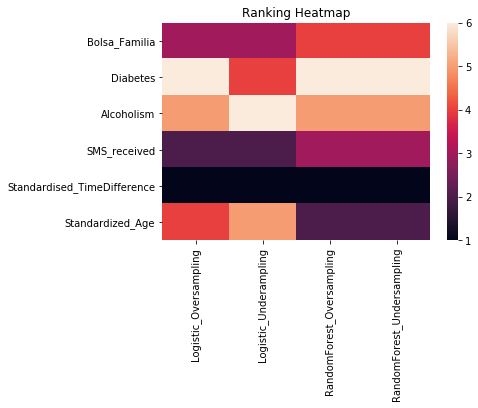

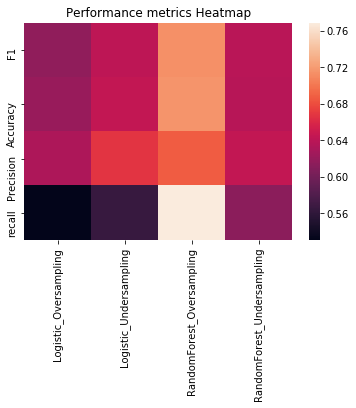

In [166]:
rindex=['Bolsa_Familia','Diabetes','Alcoholism','SMS_received','Standardised_TimeDifference','Standardized_Age']
mindex=['F1','Accuracy','Precision','recall']
col=['Logistic_Oversampling','RandomForest_Oversampling','Logistic_Undersampling','RandomForest_Undersampling']
d={'Logistic_Oversampling':[3,6,5,2,1,4],'RandomForest_Oversampling':[4,6,5,3,1,2],'Logistic_Underampling':[3,4,6,2,1,5],'RandomForest_Undersampling':[4,6,5,3,1,2]}
ranking_matrix=pd.DataFrame(data=d,index=rindex)
e={
    'Logistic_Oversampling':[0.616846,0.621049,0.63262770,0.530579],
    'RandomForest_Oversampling':[0.714762,0.715803,0.686918,0.768779],
    'Logistic_Undersampling':[0.642177,0.644671,0.667709,0.565398],
    'RandomForest_Undersampling':[0.639434,0.638100,0.644399,0.614072]
}
accuracy_matrix=pd.DataFrame(data=e,index=mindex)
import seaborn as sns
import matplotlib.pyplot as plt

display(ranking_matrix)
print('Ranking Matrix')
display(accuracy_matrix)
print('Performance Metrics')
plt.figure()
sns.heatmap(ranking_matrix)
plt.title('Ranking Heatmap')
plt.figure()
sns.heatmap(accuracy_matrix)
plt.title('Performance metrics Heatmap')





<a id='conclusions and Limitations'></a>
## Conclusions and Limitations

> Two types of Regression in combination with two types of data balancing methods were followed.All in all 4 different models were run.
>It was found that the best model was that of Random Forest classifier utilising oversampling technique. This model had an accuracy of 71.5% and a precision of 68.9%, the precision represents the true positives as a percentage of positives and is a much more important metric in our case.
The other models yield lower results. All these can be seen in the table above.
>
>The main relationships found from this analysis were with the Time Difference, Age and SMS-received with the noshows.It can be said that the former three are related to the latter.
According to our best model SMS is the 3rd most important factor preceded by age and the time difference.

>We can infer that:
<li> The earlier the people book their appointment, the more they are probable to not show up.
<li> Receiving SMS the previous day increases their probability of showing up.
<li> Older patients tend to be less absent that their younger counterparts.This may be the case because older people usually have more serious ailments than younger ones.
<li> Enrolment in the Bolsa Familia Program also increases people's odds of showing up. Its intuitive because this program pays people who attend these medical appointments and other social welfare events organized by the Brazilian Government.

>As far as the limitations go,this dataset had some bad records as mentioned before.There were around 3000 records with an age 0 these were excluded,they may have influenced the analysis if they werent excluded.This analysis is more of a descriptive analysis than inferential.We are only considering a sample of the population and do not know if the behaviour of the whole population resembles this dataset.Inferential analysis can further be done which is not in the scope of this project. A few records also had a appointment date earlier than booked date, these were also deleted. Overall this dataset was cleaned to the best extent possible. In our case the worst model showed a 62% Accuracy and this could be improved with more data. Our best model is based on the assumption that bootstrapping emulates the real world representation of the no-shows,however there is always a chance for error. I would like to conclude that collecting more data can improve our Logistic Regression model accuracy. This model is also easier to interpret in terms of feature weights.The SVM method can also be applied to our dataset.This takes longer time to run.It was tested and gave out poorer results than the current models and hence excluded.

